##### Presenation [Video Game Insighhts]{https://bitly.ws/3ihXh}

In [1]:
# Merge test
%pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import libraries that are needed
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from prophet import Prophet
import datetime as dt
import numpy as np

##### Step 1 - Read in Kaggle and IGBG Sales Data

In [3]:
#  Read in Kaggle data from csv file
#vg_path = Path('..//Uncleaned Data//Video game sales kaggle//video_games_sales.csv')
vg_path = Path('../Cleaned Data/video_games_sales.csv')

video_game_sales_df = pd.read_csv(vg_path)



In [4]:
# Read in Combined Video game data from csv file
vg_combined_path = Path('../Cleaned Data/ratings_and_sales.csv')

combined_ratings_sales_df = pd.read_csv(vg_combined_path)
combined_ratings_sales_df.head()

,Unnamed: 0,name,id,category,first_release_date,genres,release_dates,rating,rating_count,total_rating,...,rank,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,0,007 Racing,1642,0,2000-11-20,['Racing'],"[[Timestamp('2000-11-20 00:00:00'), Timestamp(...",62.753695,21.0,62.753695,...,3770,PS,2000.0,Racing,Electronic Arts,0.30,0.20,0.0,0.03,0.53
1,1,1 vs. 100,74406,0,2009-11-19,['Quiz/Trivia'],"[[Timestamp('2009-11-19 00:00:00'), Timestamp(...",57.000000,2.0,57.000000,...,11233,DS,2008.0,Misc,DSI Games,0.08,0.00,0.0,0.01,0.09
2,2,101-in-1 Explosive Megamix,23025,0,2008-11-28,[nan],"[[Timestamp('2011-11-13 00:00:00'), Timestamp(...",52.000000,1.0,51.833333,...,7712,DS,2008.0,Puzzle,Nordcurrent,0.05,0.13,0.0,0.02,0.20
3,3,15 Days,26208,0,2009-11-13,"['Point-and-click', 'Adventure', 'Indie']","[[Timestamp('2010-06-25 00:00:00'), Timestamp(...",50.000000,3.0,50.000000,...,16543,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.0,0.00,0.01
4,4,18 Wheeler: American Pro Trucker,3706,0,1999-01-01,['Racing'],"[[Timestamp('1999-01-01 00:00:00'), Timestamp(...",70.932779,14.0,58.466390,...,4832,PS2,2001.0,Racing,Acclaim Entertainment,0.20,0.15,0.0,0.05,0.40


In [5]:
# Print the first 5 rows of the dataframe from Kaggle data to see what it looks like
video_game_sales_df.head()


,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
# Print Video Game Sales data info
video_game_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
# Display the columns in the dataframe
video_game_sales_df['year'] = pd.to_datetime(video_game_sales_df['year'])
video_game_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rank          16598 non-null  int64         
 1   name          16598 non-null  object        
 2   platform      16598 non-null  object        
 3   year          16327 non-null  datetime64[ns]
 4   genre         16598 non-null  object        
 5   publisher     16540 non-null  object        
 6   na_sales      16598 non-null  float64       
 7   eu_sales      16598 non-null  float64       
 8   jp_sales      16598 non-null  float64       
 9   other_sales   16598 non-null  float64       
 10  global_sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
# Handle missing or null values

In [99]:
# Convert data types as necessary

In [100]:
# Standardize categorical variables to ensure consistency in the data

# 2 - Grouping The Data

In [9]:
# Group data by ratings and calculate total sales for each rating
ratings_and_sales = pd.read_csv('../Cleaned Data/ratings_and_sales.csv')
ratings_and_sales['rating_bins'] = pd.cut(ratings_and_sales['rating'], bins=10, labels=False) * 10
ratings_and_sales.head()
avg_sales_per_bin = ratings_and_sales.groupby('rating_bins')['global_sales'].mean()

In [102]:
# Group data by release date and compute statistics (e.g., total sales, average ratings) for each time period


In [10]:
# (#16) Group data by genre and calculate average ratings for each genre
def genre_mean(x):
    return x.mean()


genre_ratings_df = combined_ratings_sales_df.groupby(["genre"]).\
            apply(lambda x: pd.Series({"Average Rating by Genre": genre_mean(x["rating"])}))
genre_ratings_df


,Average Rating by Genre
genre,
Action,70.200557
Adventure,69.231025
Fighting,70.066764
Misc,70.067769
Platform,68.449445
Puzzle,68.824238
Racing,68.365419
Role-Playing,76.592562
Shooter,70.752710


In [11]:
# (#16+) Group data by genre and calculate average ratings for each genre- showing rated top 5
genre_ratings_sorted = genre_ratings_df.sort_values(by=["Average Rating by Genre",],ascending=False)
genre_ratings_sorted.head()

,Average Rating by Genre
genre,
Role-Playing,76.592562
Strategy,72.771262
Shooter,70.752710
Action,70.200557
Misc,70.067769


In [12]:
# (#15) Group data by Sales by Genre
def genre_sum(x):
    return x.sum()


genre_sales_df = video_game_sales_df.groupby(["genre"]). \
            apply(lambda x: pd.Series({"Global Sales by Genre": genre_sum(x["global_sales"])}))
genre_sales_df

,Global Sales by Genre
genre,
Action,1751.18
Adventure,239.04
Fighting,448.91
Misc,809.96
Platform,831.37
Puzzle,244.95
Racing,732.04
Role-Playing,927.37
Shooter,1037.37


In [13]:
# (#15+) Group data by Sales by Genre - showing top 5
genre_sales_df_sorted = genre_sales_df.sort_values(by=["Global Sales by Genre",],ascending=False)
genre_sales_df_sorted.head()

,Global Sales by Genre
genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37


In [14]:
# # Group data by region (North America, EU, Japan) and calculate total sales for each region
# video_game_by_country = video_game_sales_df.groupby(level=0)[['na_sales', 'eu_sales', 'jp_sales']].sum()
# video_game_by_country

# Group data by region (North America, EU, Japan) and calculate total sales for each region
video_game_by_country = video_game_sales_df.groupby(level=0)[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Add the name column by selecting the first occurrence of the name for each group
video_game_by_country['name'] = video_game_sales_df.groupby(level=0)['name'].first()

# Display the resulting DataFrame
print(video_game_by_country)

       na_sales  eu_sales  jp_sales  \
0         41.49     29.02      3.77   
1         29.08      3.58      6.81   
2         15.85     12.88      3.79   
3         15.75     11.01      3.28   
4         11.27      8.89     10.22   
...         ...       ...       ...   
16593      0.01      0.00      0.00   
16594      0.01      0.00      0.00   
16595      0.00      0.00      0.00   
16596      0.00      0.01      0.00   
16597      0.01      0.00      0.00   

                                                   name  
0                                            Wii Sports  
1                                     Super Mario Bros.  
2                                        Mario Kart Wii  
3                                     Wii Sports Resort  
4                              Pokemon Red/Pokemon Blue  
...                                                 ...  
16593                Woody Woodpecker in Crazy Castle 5  
16594                     Men in Black II: Alien Escape  
16595  SC

In [15]:
# Group sales data by platform and calculate total sales for each platform
platform_sales_df = video_game_sales_df.groupby("platform")["global_sales"].sum().reset_index(name="Global Sales by Platform")
# Sort the DataFrame by 'Global Sales by Platform' column in descending order
platform_sales_df = platform_sales_df.sort_values(by="Global Sales by Platform", ascending=False)
platform_sales_df

,platform,Global Sales by Platform
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


In [16]:
# Group sales data by the Video Game and calculate total sales for each Video Game
video_game_sales_df = video_game_sales_df.groupby("name")["global_sales"].sum().reset_index(name="Global Sales by Video Game")
# Sort the DataFrame by 'Global Sales by Platform' column in descending order
video_game_sales_df = video_game_sales_df.sort_values(by="Global Sales by Video Game", ascending=False)
video_game_sales_df

,name,Global Sales by Video Game
11007,Wii Sports,82.74
3712,Grand Theft Auto V,55.92
9327,Super Mario Bros.,45.31
9715,Tetris,35.84
5573,Mario Kart Wii,35.82
...,...,...
1536,Codename: Panzers Phase Two,0.01
9677,Tengai Makyo: Dai Yon no Mokushiroku,0.01
4551,Jewel Quest II,0.01
9680,Tenjin Ranman: Happy GO Lucky!!,0.01


# Visualizing the Data

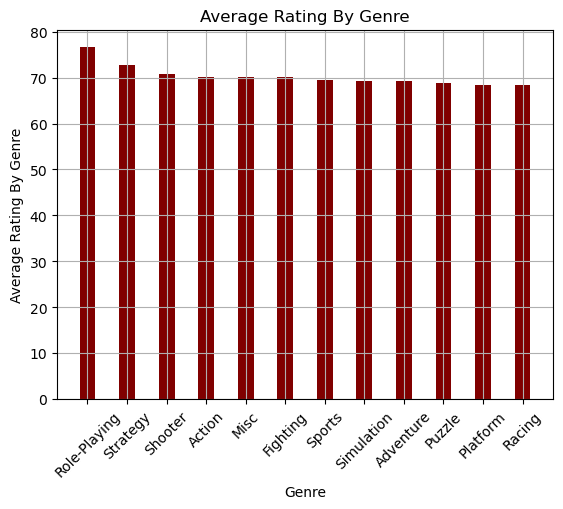

In [17]:
# (#64) Visualize the data by genre vs ratings

genre = genre_ratings_sorted.index
rating = genre_ratings_sorted['Average Rating by Genre']
plt.bar(genre, rating, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Genre")
plt.ylabel("Average Rating By Genre")
plt.title("Average Rating By Genre")
plt.grid()
plt.xticks(rotation = 45)
plt.show()

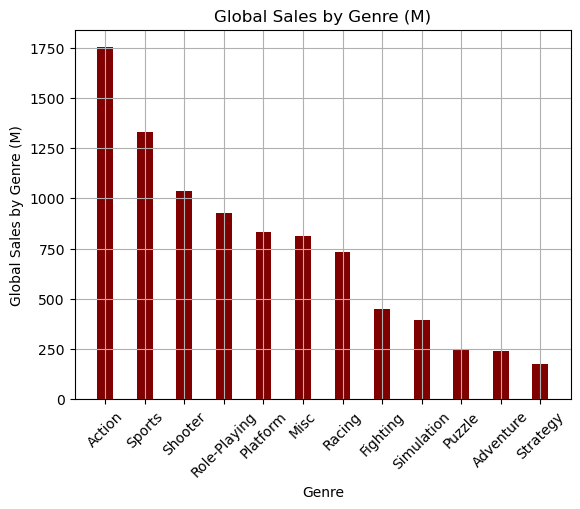

In [18]:
##(#65) Visualize the data by genre vs sales


genre = genre_sales_df_sorted.index
sales = genre_sales_df_sorted['Global Sales by Genre']
plt.bar(genre, sales, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Genre")
plt.ylabel("Global Sales by Genre (M)")
plt.title("Global Sales by Genre (M)")
plt.grid()
plt.xticks(rotation = 45)
plt.show()

[Text(0, 0, '0-9'),
 Text(1, 0, '10-19'),
 Text(2, 0, '20-29'),
 Text(3, 0, '30-39'),
 Text(4, 0, '40-49'),
 Text(5, 0, '50-59'),
 Text(6, 0, '60-69'),
 Text(7, 0, '70-79'),
 Text(8, 0, '80-89'),
 Text(9, 0, '90-99')]

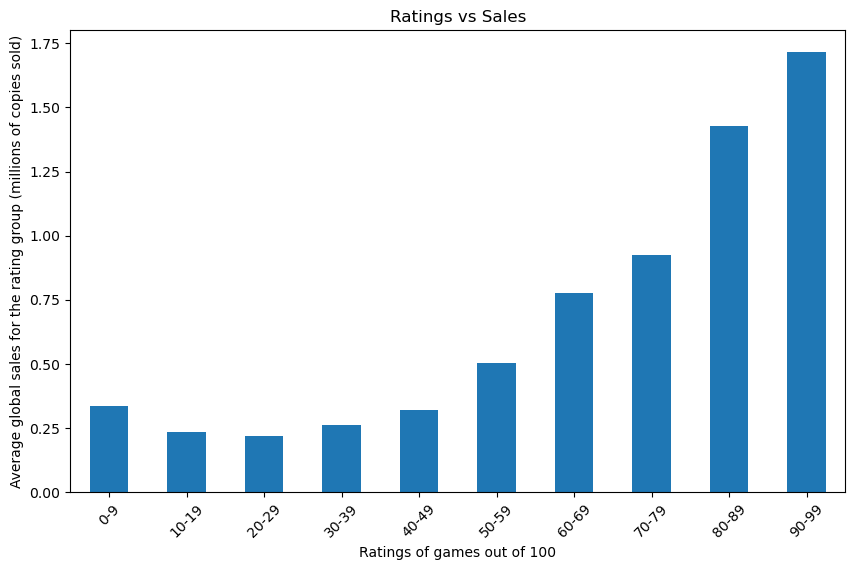

In [134]:
#visualize the data by ratings vs sales
figure2 = avg_sales_per_bin.plot(kind='bar', figsize=(10, 6))
figure2.set_xlabel("Ratings of games out of 100")
figure2.set_ylabel('Average global sales for the rating group (millions of copies sold)')
figure2.set_title('Ratings vs Sales')
figure2.set_xticklabels([f'{x}-{x+9}' for x in range(0, 100, 10)], rotation=45)

In [20]:
correlation = ratings_and_sales['rating'].corr(ratings_and_sales['global_sales'])
print(f"Correlation between ratings and sales: {correlation}")

Correlation between ratings and sales: 0.15298133746818485


In [21]:
#read in dataframe
vg_ratings = pd.read_csv('..//Cleaned Data//video_games_ratings.csv')
#split ratings into 10 bins
vg_ratings['rating_bins'] = pd.cut(vg_ratings['rating'], bins=10, labels=False) * 10
#count how many games are in each bin
bin_counts = vg_ratings['rating_bins'].value_counts().sort_index()


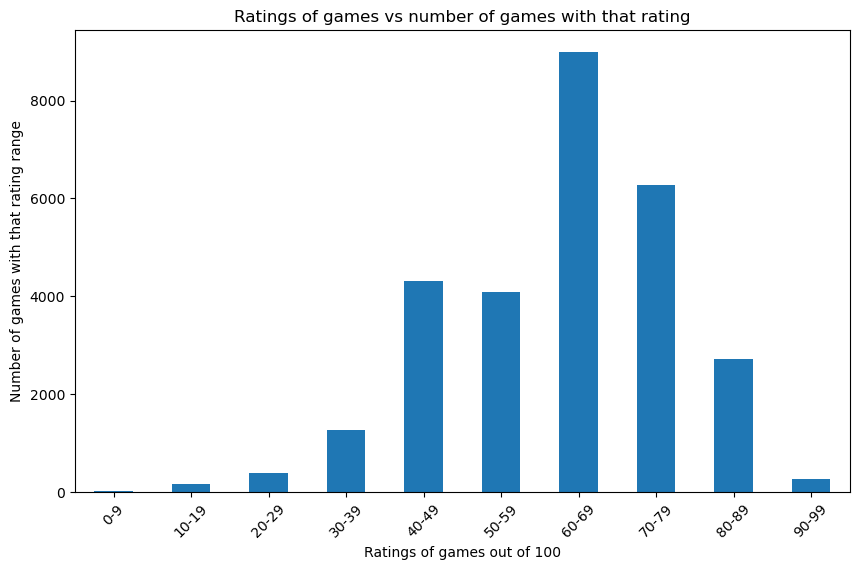

In [135]:
#plot rating bins vs value counts
figure1 = bin_counts.plot(kind='bar',figsize=(10, 6))
figure1.set_xlabel("Ratings of games out of 100")
figure1.set_ylabel('Number of games with that rating range')
figure1.set_title('Ratings of games vs number of games with that rating')
figure1.set_xticks(range(len(bin_counts)), labels=[f'{x}-{x+9}' for x in range(0, 100, 10)], rotation=45)

<Axes: title={'center': 'Global Sales by Platform'}, xlabel='platform', ylabel='Millions of Copies Sold'>

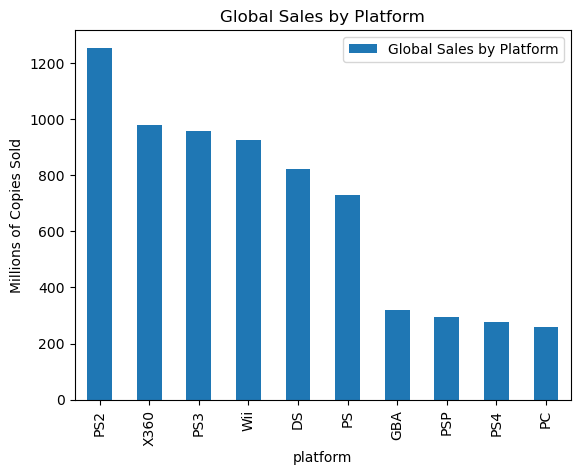

In [125]:
#Visualize Sales by Platform usign a bar chart
platform_sales_df.head(10).plot(kind='bar', x='platform', y='Global Sales by Platform', title='Global Sales by Platform', ylabel='Millions of Copies Sold')


<Axes: title={'center': 'Global Sales by Platform'}>

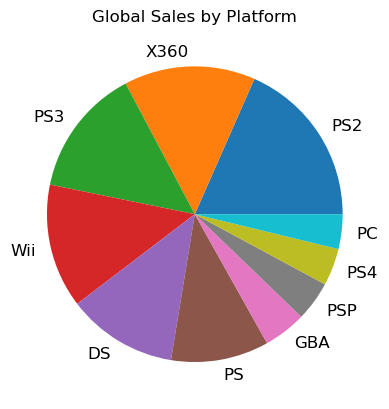

In [128]:
#Visualize Sales by Platform usign a bar chart
platform_sales_df.head(10).plot(kind='pie', y='Global Sales by Platform', ylabel='', labels=platform_sales_df['platform'], legend=False, fontsize=12, title='Global Sales by Platform')

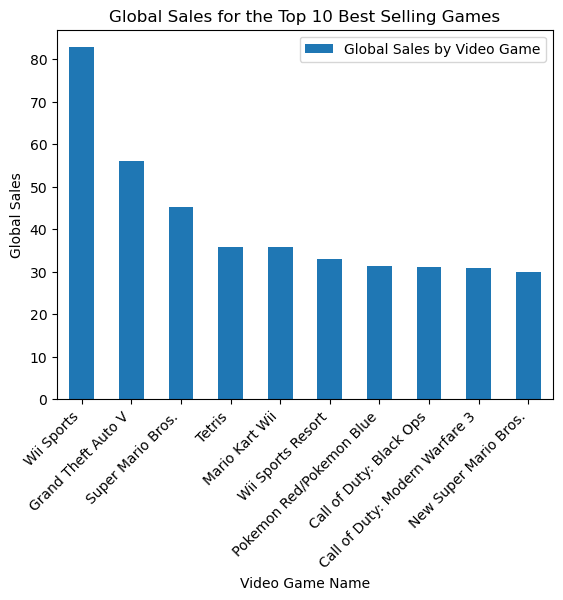

In [130]:
#Visualize Sales by Video Game usign a bar    
def plot_bar(df, x_col, y_col, x_label, y_label, title):
    ax = df.head(10).plot(kind='bar', x=x_col, y=y_col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

# Usage example:
plot_bar(video_game_sales_df, 'name', 'Global Sales by Video Game', 'Video Game Name', 'Global Sales', 'Global Sales for the Top 10 Best Selling Games')


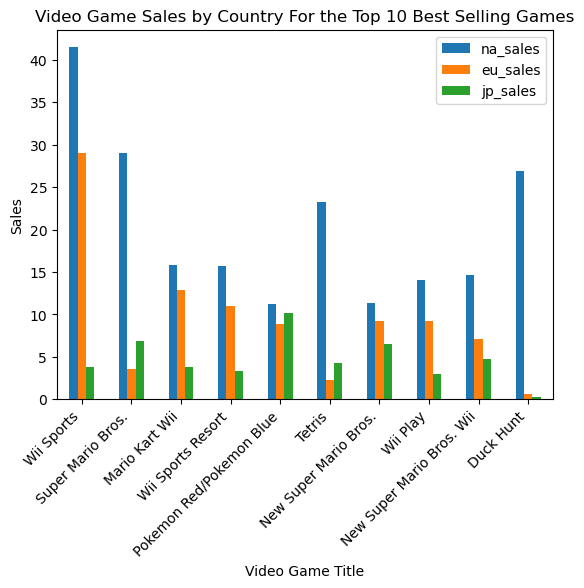

In [131]:
def plot_bar(df, x_col, y_col, x_label, y_label, title):
    ax = df.head(10).plot(kind='bar', x=x_col, y=y_col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

# Plotting the grouped data using the plot_bar function
plot_bar(video_game_by_country, x_col='name', y_col=['na_sales', 'eu_sales', 'jp_sales'],
         x_label='Video Game Title', y_label='Sales', title='Video Game Sales by Country For the Top 10 Best Selling Games')



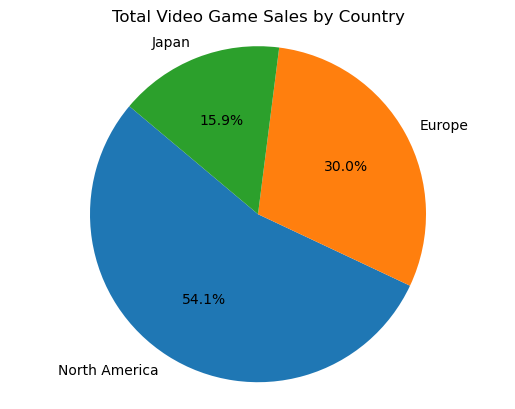

In [132]:


def plot_pie(df, labels, sizes, title):
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)
    plt.show()

# Example usage of the plot_pie function
labels = ['North America', 'Europe', 'Japan']
sizes = [video_game_by_country['na_sales'].sum(), video_game_by_country['eu_sales'].sum(), video_game_by_country['jp_sales'].sum()]
plot_pie(video_game_by_country, labels, sizes, title='Total Video Game Sales by Country')


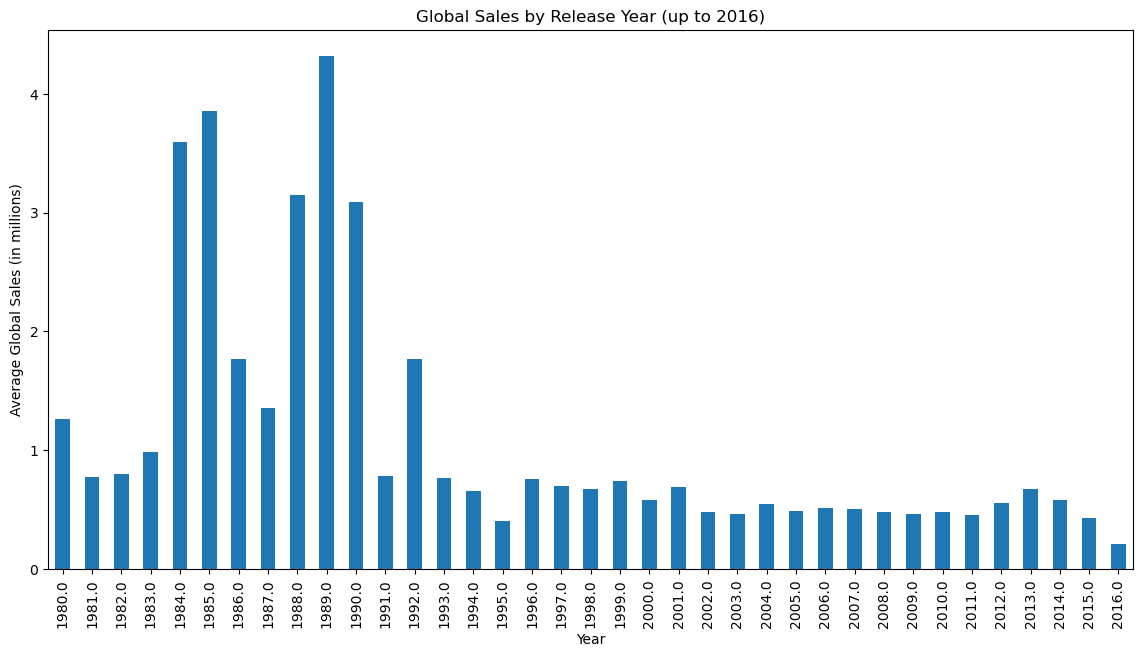

In [133]:
# read in dataframe
sales_df = pd.read_csv('..//Cleaned Data//video_games_sales.csv')
sales_df['year'] = pd.to_datetime(sales_df['year'], format='%Y')
sales_df['year'] = sales_df['year'].dt.year

# Filter data to exclude years after 2016 (the data is incomplete there)
filtered_sales_df = sales_df[sales_df['year'] <= 2016]

plt.figure(figsize=(14, 7))
filtered_sales_df.groupby('year')['global_sales'].mean().plot(kind='bar')
plt.title('Global Sales by Release Year (up to 2016)')
plt.xlabel('Year')
plt.ylabel('Average Global Sales (in millions)')
plt.show()

In [29]:
correlation_sales_release_year = filtered_sales_df['global_sales'].corr(filtered_sales_df['year'])
print(f"Correlation between global sales and release year: {correlation_sales_release_year}")

Correlation between global sales and release year: -0.07463618577694422


C:\Users\cccov\AppData\Local\Temp\ipykernel_38316\4049006418.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ratings_df['first_release_date'] = pd.to_datetime(ratings_df['first_release_date'], infer_datetime_format=True)


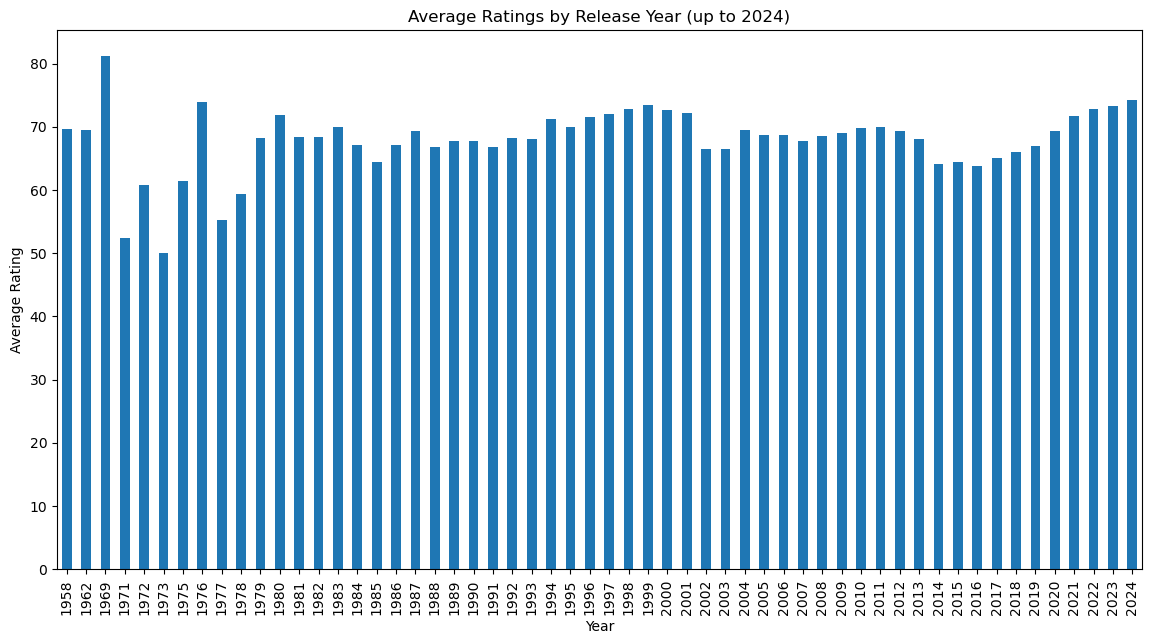

In [30]:
# read in dataframe
ratings_df = pd.read_csv('..//Cleaned Data//video_games_ratings.csv')
ratings_df['first_release_date'] = pd.to_datetime(ratings_df['first_release_date'], infer_datetime_format=True)
ratings_df['release_year'] = ratings_df['first_release_date'].dt.year

# Filter data to exclude years after 2024 (idk why theres ratings for games that come out in 2025 its not 2025 yet)
filtered_ratings_df = ratings_df[ratings_df['release_year'] <= 2024]

plt.figure(figsize=(14, 7))
filtered_ratings_df.groupby('release_year')['rating'].mean().plot(kind='bar')
plt.title('Average Ratings by Release Year (up to 2024)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

In [31]:
correlation_ratings_release_year = filtered_ratings_df['rating'].corr(filtered_ratings_df['release_year'])
print(f"Correlation between ratings and release year: {correlation_ratings_release_year}")

Correlation between ratings and release year: -0.0695380584447777


In [32]:
# ReRead in Combined Video game sales data from csv file
vg_combined_path = Path('../Cleaned Data/ratings_and_sales.csv')

combined_ratings_sales_df = pd.read_csv(vg_combined_path)
combined_ratings_sales_df.head()

,Unnamed: 0,name,id,category,first_release_date,genres,release_dates,rating,rating_count,total_rating,...,rank,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,0,007 Racing,1642,0,2000-11-20,['Racing'],"[[Timestamp('2000-11-20 00:00:00'), Timestamp(...",62.753695,21.0,62.753695,...,3770,PS,2000.0,Racing,Electronic Arts,0.30,0.20,0.0,0.03,0.53
1,1,1 vs. 100,74406,0,2009-11-19,['Quiz/Trivia'],"[[Timestamp('2009-11-19 00:00:00'), Timestamp(...",57.000000,2.0,57.000000,...,11233,DS,2008.0,Misc,DSI Games,0.08,0.00,0.0,0.01,0.09
2,2,101-in-1 Explosive Megamix,23025,0,2008-11-28,[nan],"[[Timestamp('2011-11-13 00:00:00'), Timestamp(...",52.000000,1.0,51.833333,...,7712,DS,2008.0,Puzzle,Nordcurrent,0.05,0.13,0.0,0.02,0.20
3,3,15 Days,26208,0,2009-11-13,"['Point-and-click', 'Adventure', 'Indie']","[[Timestamp('2010-06-25 00:00:00'), Timestamp(...",50.000000,3.0,50.000000,...,16543,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.0,0.00,0.01
4,4,18 Wheeler: American Pro Trucker,3706,0,1999-01-01,['Racing'],"[[Timestamp('1999-01-01 00:00:00'), Timestamp(...",70.932779,14.0,58.466390,...,4832,PS2,2001.0,Racing,Acclaim Entertainment,0.20,0.15,0.0,0.05,0.40


In [33]:
# Group data by Sales by Publisher
def publisher_sum(x):
    return x.sum()


all_publisher_sales_df = combined_ratings_sales_df.groupby(["publisher"]). \
            apply(lambda x: pd.Series({"Global Sales by Publisher": publisher_sum(x["global_sales"])}))
all_publisher_sales_df.head()

,Global Sales by Publisher
publisher,
10TACLE Studios,0.03
1C Company,0.10
20th Century Fox Video Games,0.79
2D Boy,0.04
3DO,6.19


In [34]:
# Group data by Sales by Publisher - showing top 5
all_publisher_sales_df_sorted = all_publisher_sales_df.sort_values(by=["Global Sales by Publisher",],ascending=False)
all_publisher_sales_df_sorted.head()

,Global Sales by Publisher
publisher,
Nintendo,1387.32
Electronic Arts,884.13
Activision,554.92
Sony Computer Entertainment,407.37
Take-Two Interactive,351.59


In [35]:
# set year to a string type for reformating to a full date (yyyy-mm-dd).  This prep needed for upcoming Prophet forcasting.
combined_ratings_sales_df['year'] = combined_ratings_sales_df['year'].astype("string")

In [36]:


# convert year (xxxx) to a full date (yyyy-12-31).  Change to a list based process as an improvement task (future)
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1983.0", 'year'] = '1983-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1984.0", 'year'] = '1984-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1985.0", 'year'] = '1985-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1986.0", 'year'] = '1986-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1987.0", 'year'] = '1987-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1988.0", 'year'] = '1988-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1989.0", 'year'] = '1989-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1990.0", 'year'] = '1990-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1991.0", 'year'] = '1991-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1992.0", 'year'] = '1992-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1993.0", 'year'] = '1993-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1994.0", 'year'] = '1994-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1995.0", 'year'] = '1995-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1996.0", 'year'] = '1996-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1997.0", 'year'] = '1997-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1998.0", 'year'] = '1998-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "1999.0", 'year'] = '1999-12-31'

Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2000.0", 'year'] = '2000-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2001.0", 'year'] = '2001-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2002.0", 'year'] = '2002-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2003.0", 'year'] = '2003-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2004.0", 'year'] = '2004-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2005.0", 'year'] = '2005-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2006.0", 'year'] = '2006-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2007.0", 'year'] = '2007-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2008.0", 'year'] = '2008-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2009.0", 'year'] = '2009-12-31'

Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2010.0", 'year'] = '2010-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2011.0", 'year'] = '2011-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2012.0", 'year'] = '2012-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2013.0", 'year'] = '2013-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2014.0", 'year'] = '2014-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2015.0", 'year'] = '2015-12-31'
Nintendo_df = combined_ratings_sales_df.loc[combined_ratings_sales_df['year'] == "2016.0", 'year'] = '2016-12-31'

Nintendo_df
       



'2016-12-31'

In [37]:
# select out only those rows that pertain to Nintendo only
Nintendo_df = combined_ratings_sales_df.loc[(combined_ratings_sales_df["publisher"] == "Nintendo")]
Nintendo_df

,Unnamed: 0,name,id,category,first_release_date,genres,release_dates,rating,rating_count,total_rating,...,rank,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
47,47,ASH: Archaic Sealed Heat,44072,0,2007-10-04,"['Role-playing (RPG)', 'Strategy', 'Turn-based...","[[Timestamp('2007-10-04 00:00:00')], [Timestam...",60.000000,0.0,60.000000,...,9982,DS,2007-12-31,Role-Playing,Nintendo,0.00,0.00,0.12,0.00,0.12
69,69,Advance Wars,1691,0,2001-09-10,"['Simulator', 'Strategy', 'Turn-based strategy...","[[Timestamp('2001-09-10 00:00:00'), Timestamp(...",82.939454,109.0,91.469727,...,2925,GBA,2001-12-31,Strategy,Nintendo,0.50,0.19,0.00,0.01,0.70
70,70,Advance Wars 2: Black Hole Rising,236815,8,2023-04-21,"['Strategy', 'Turn-based strategy (TBS)', 'Tac...","[[Timestamp('2023-04-21 00:00:00'), Timestamp(...",86.196435,45.0,88.348218,...,3115,GBA,2003-12-31,Strategy,Nintendo,0.47,0.17,0.00,0.01,0.65
71,71,Advance Wars: Days of Ruin,1694,0,2008-01-21,"['Strategy', 'Turn-based strategy (TBS)']","[[Timestamp('2008-01-21 00:00:00'), Timestamp(...",79.787214,29.0,82.226940,...,3219,DS,<NA>,Strategy,Nintendo,0.44,0.13,0.00,0.06,0.63
72,72,Advance Wars: Dual Strike,1693,0,2005-06-23,"['Simulator', 'Strategy', 'Turn-based strategy...","[[Timestamp('2005-06-23 00:00:00'), Timestamp(...",87.767191,50.0,89.216929,...,4806,DS,2005-12-31,Strategy,Nintendo,0.30,0.03,0.04,0.03,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7698,7698,Yoshi's New Island,4591,0,2014-03-13,"['Platform', 'Adventure']","[[Timestamp('2014-03-14 00:00:00'), Timestamp(...",60.305091,18.0,61.691007,...,1432,3DS,2014-12-31,Platform,Nintendo,0.47,0.51,0.28,0.09,1.36
7699,7699,Yoshi's Story,3213,0,1997-12-21,['Platform'],"[[Timestamp('1998-05-10 00:00:00'), Timestamp(...",72.579980,91.0,72.579980,...,511,N64,1997-12-31,Platform,Nintendo,1.29,0.53,0.98,0.05,2.85
7700,7700,Yoshi's Woolly World,7343,0,2015-06-26,['Platform'],"[[Timestamp('2015-06-26 00:00:00'), Timestamp(...",71.906944,58.0,75.353472,...,1528,WiiU,2015-12-31,Platform,Nintendo,0.61,0.47,0.11,0.10,1.29
7733,7733,Zack & Wiki: Quest for Barbaros' Treasure,2264,0,2007-10-16,"['Point-and-click', 'Puzzle', 'Adventure']","[[Timestamp('2007-10-25 00:00:00'), Timestamp(...",77.533674,18.0,81.266837,...,4655,Wii,2007-12-31,Adventure,Nintendo,0.18,0.17,0.03,0.04,0.42


In [38]:
# Group Yearly Sales by Publisher Nintendo (top publisher)
def publisher_sum(x):
    return x.sum()


publisher_sales_df = Nintendo_df.groupby(["year"]). \
            apply(lambda x: pd.Series({"Global Yearly Sales by Nintendo": publisher_sum(x["global_sales"])}))
publisher_sales_df

,Global Yearly Sales by Nintendo
year,
1983-12-31,10.96
1984-12-31,44.11
1985-12-31,49.95
1986-12-31,16.18
1987-12-31,11.95
1988-12-31,36.44
1989-12-31,61.40
1990-12-31,32.08
1991-12-31,15.79


In [39]:
# Group data by Sales by Publisher- showing top 10
publisher_sales_df_sorted = publisher_sales_df.sort_values(by=["year", "Global Yearly Sales by Nintendo"],ascending=True)
publisher_sales_df_sorted.head(10)

,Global Yearly Sales by Nintendo
year,
1983-12-31,10.96
1984-12-31,44.11
1985-12-31,49.95
1986-12-31,16.18
1987-12-31,11.95
1988-12-31,36.44
1989-12-31,61.40
1990-12-31,32.08
1991-12-31,15.79


In [40]:
# Reset off of date index
publisher_sales_df_sorted.reset_index(inplace=True)
publisher_sales_df_sorted.index

RangeIndex(start=0, stop=34, step=1)

In [41]:
# drop the index to prep for Prophet
publisher_sales_df_prep = publisher_sales_df_sorted.reset_index(drop=True)

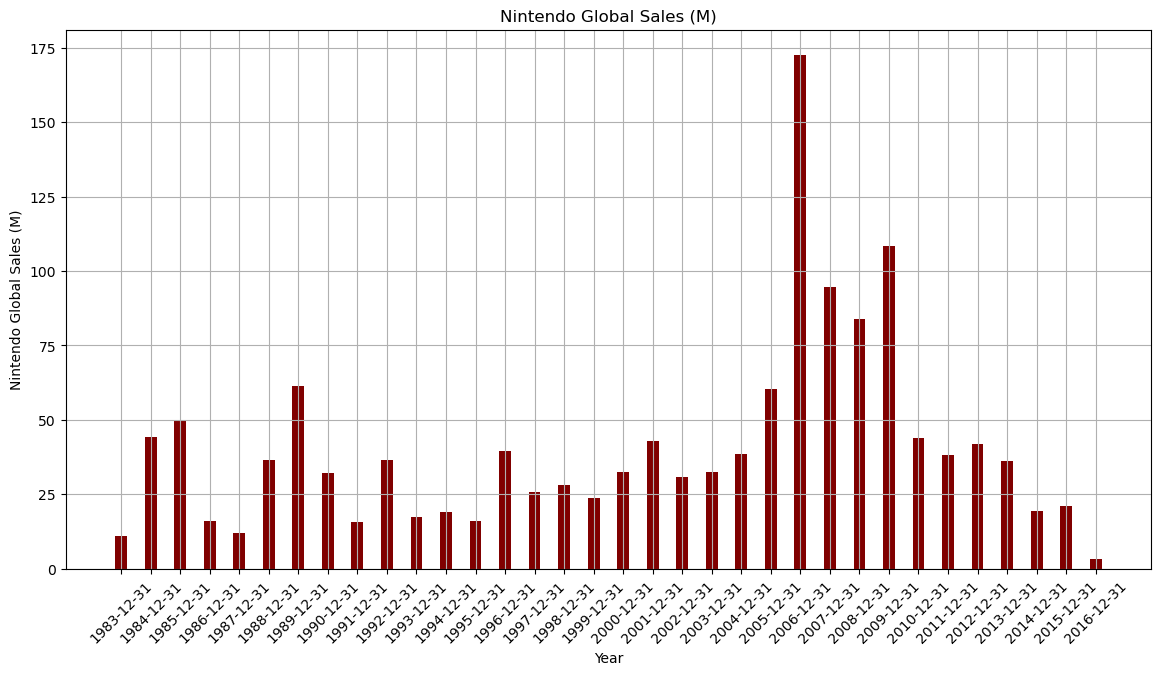

In [42]:
# Show graph of Nintendo's global yearly sales
year = publisher_sales_df_sorted['year']
sales = publisher_sales_df_sorted['Global Yearly Sales by Nintendo']
plt.figure(figsize=(14, 7))
plt.bar(year, sales, color ='maroon',
        width = 0.4)
plt.xlabel("Year")
plt.ylabel("Nintendo Global Sales (M)")
plt.title("Nintendo Global Sales (M)")
plt.grid()
plt.xticks(rotation = 45)
plt.show()



In [43]:
# Set columns up for Prophet
publisher_sales_df_prep.columns = ['ds', 'y']
publisher_sales_df_prep.head()


,ds,y
0,1983-12-31,10.96
1,1984-12-31,44.11
2,1985-12-31,49.95
3,1986-12-31,16.18
4,1987-12-31,11.95


In [44]:
#set up Prophet object (obj)
obj = Prophet()
obj

In [45]:
#fit data to Prophet object
obj.fit(publisher_sales_df_prep)

19:11:08 - cmdstanpy - INFO - Chain [1] start processing
19:11:09 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
# set up prophet dataframe forcasting period for 36 months
future = obj.make_future_dataframe(periods=36, freq='m')

In [47]:
#Show end of forcasting dataframe
future.tail(20)

,ds
50,2018-05-31
51,2018-06-30
52,2018-07-31
53,2018-08-31
54,2018-09-30
55,2018-10-31
56,2018-11-30
57,2018-12-31
58,2019-01-31
59,2019-02-28


In [48]:
#produce Prophet forecast
forecast_trends_df = obj.predict(future)

In [49]:
#show forecast area of Prophet dataframe 
forecast_trends_df.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
60,2019-03-31,-26.346912,-134.916299,-56.728437,-26.346944,-26.346878,-69.620874,-69.620874,-69.620874,-69.620874,-69.620874,-69.620874,0.0,0.0,0.0,-95.967786
61,2019-04-30,-26.281834,114.809504,194.444709,-26.281869,-26.281798,182.956267,182.956267,182.956267,182.956267,182.956267,182.956267,0.0,0.0,0.0,156.674433
62,2019-05-31,-26.214587,233.003099,312.388497,-26.214625,-26.214549,299.062123,299.062123,299.062123,299.062123,299.062123,299.062123,0.0,0.0,0.0,272.847535
63,2019-06-30,-26.149510,242.251948,323.744018,-26.149549,-26.149469,308.264219,308.264219,308.264219,308.264219,308.264219,308.264219,0.0,0.0,0.0,282.114709
64,2019-07-31,-26.082263,146.109398,224.700433,-26.082305,-26.082220,211.224796,211.224796,211.224796,211.224796,211.224796,211.224796,0.0,0.0,0.0,185.142533
65,2019-08-31,-26.015017,-18.231960,61.696270,-26.015061,-26.014971,48.502984,48.502984,48.502984,48.502984,48.502984,48.502984,0.0,0.0,0.0,22.487967
66,2019-09-30,-25.949939,-236.801565,-153.519503,-25.949985,-25.949891,-169.309538,-169.309538,-169.309538,-169.309538,-169.309538,-169.309538,0.0,0.0,0.0,-195.259477
67,2019-10-31,-25.882692,-357.935774,-283.278393,-25.882741,-25.882641,-291.635929,-291.635929,-291.635929,-291.635929,-291.635929,-291.635929,0.0,0.0,0.0,-317.518621
68,2019-11-30,-25.817615,-0.136847,77.594054,-25.817666,-25.817561,65.036914,65.036914,65.036914,65.036914,65.036914,65.036914,0.0,0.0,0.0,39.219299
69,2019-12-31,-25.750368,11.667129,88.516684,-25.750421,-25.750312,76.302676,76.302676,76.302676,76.302676,76.302676,76.302676,0.0,0.0,0.0,50.552308


c:\Users\cccov\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\cccov\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


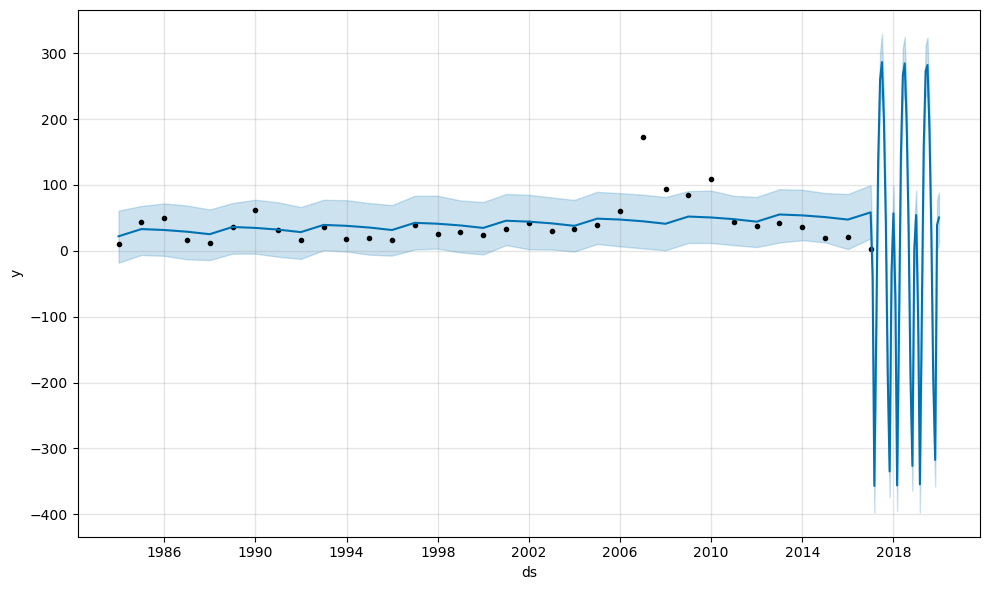

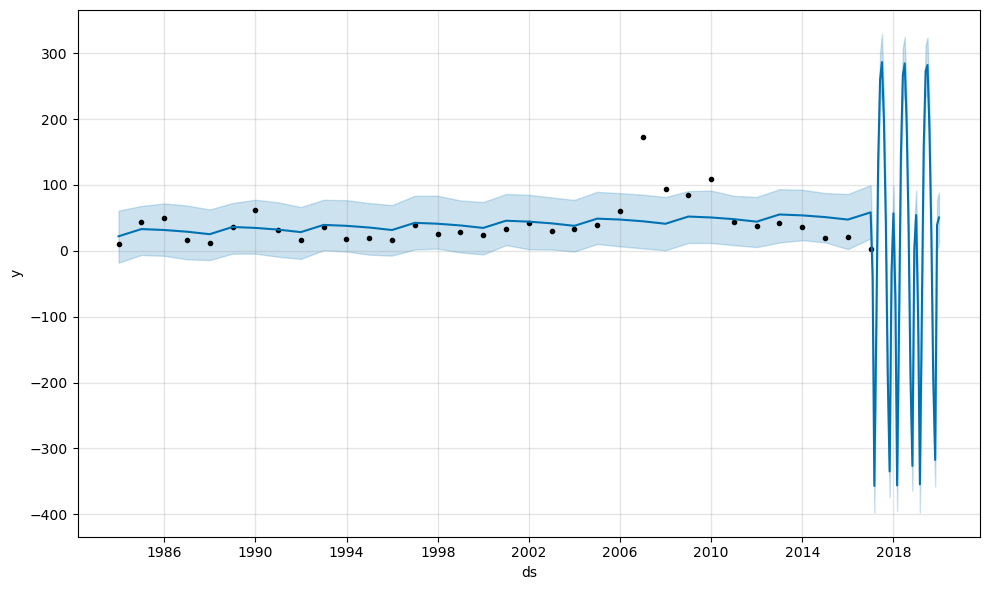

In [50]:
#Plot the results 
obj.plot(forecast_trends_df)

<Axes: >

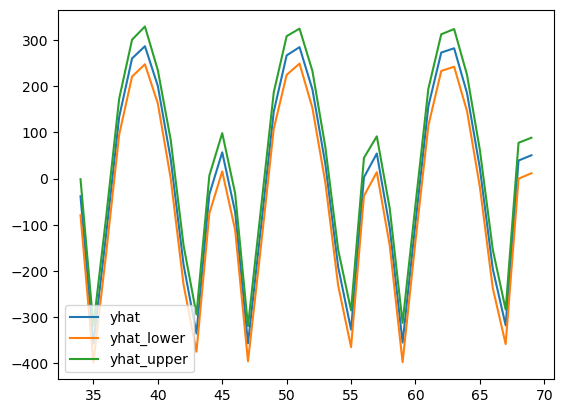

In [51]:
#Plot just the forecasted portion 
forecast_trends_df[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-36:,:].plot()

c:\Users\cccov\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\cccov\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\cccov\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

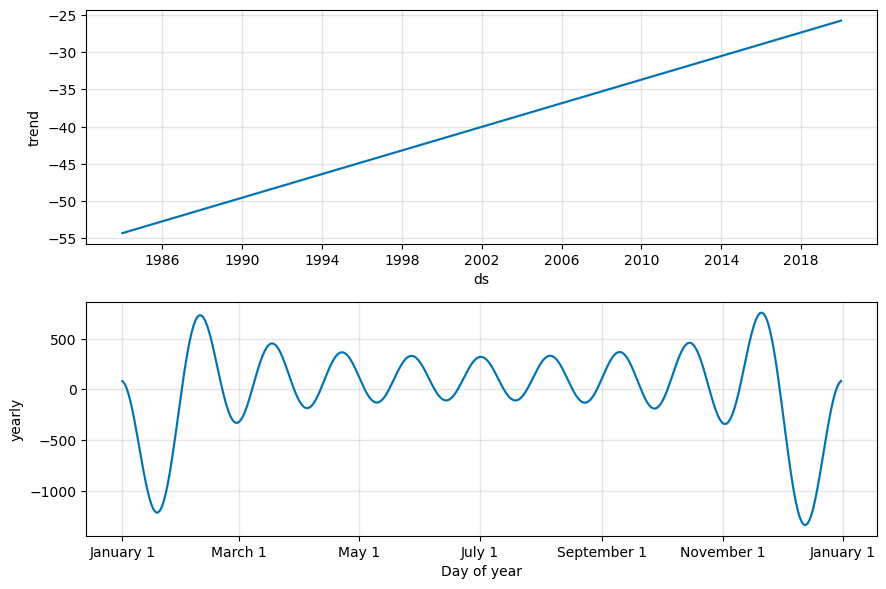

In [52]:
# Reset the index in the forecast_trends DataFrame
forecast_trends_df.reset_index(inplace=True)

# Plot_components to visualize the forecasted results 
 
graphs = obj.plot_components(forecast_trends_df)